In [1]:
import pandas as pd
# Our scripts
import sys  
sys.path.insert(0, '../src')
import sparsity_analysis as spa
%load_ext autoreload
%autoreload 2

## How K_ac sparsity affects population structure

### Produce dataframe of model dynamics with different sparse matrices

In [11]:
sizes = [4]
num = 5
lower, upper = 0.001, 0.004
def sparsity(n): 
    return 0.5
end_time = 200

results = spa.analyze(sizes,
                      num,
                      lower,
                      upper,
                      sparsity,
                      end_time)
print(results.shape)
results.to_csv('../Data/sparsity_analysis.tsv', sep='\t', index=False)
results.head()

size:   0%|          | 0/1 [00:00<?, ?it/s]

sparsity:   0%|          | 0/8 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

init:   0%|          | 0/5 [00:00<?, ?it/s]

(40, 9)


,growth_rate,has_grown,skew,euclidian,shannon_index,bray_curtis,init,sparsity,size
0,0.010292,0.75,-0.874547,0.020186,-0.176724,0.168042,0,0.0625,4
1,0.009219,0.75,-0.059966,0.020920,-0.222491,0.279494,1,0.0625,4
2,0.013167,0.75,0.206002,0.024439,-0.111579,0.280127,2,0.0625,4
3,0.010913,0.75,0.207365,0.022137,-0.241095,0.295538,3,0.0625,4
4,0.009191,0.75,0.964345,0.022330,-0.122218,0.217041,4,0.0625,4


In [12]:
df = pd.read_csv('../Data/sparsity_analysis.tsv', sep='\t')
ids = ['init', 'sparsity', 'size']
df = pd.melt(df,
             id_vars=ids,
             var_name='statistic',
             value_name='value')
df.head()

,init,sparsity,size,statistic,value
0,0,0.0625,4,growth_rate,0.010292
1,1,0.0625,4,growth_rate,0.009219
2,2,0.0625,4,growth_rate,0.013167
3,3,0.0625,4,growth_rate,0.010913
4,4,0.0625,4,growth_rate,0.009191


In [13]:
df['sparsity'].value_counts()

0.0625    30
0.1250    30
0.1875    30
0.2500    30
0.3125    30
0.3750    30
0.4375    30
0.5000    30
Name: sparsity, dtype: int64

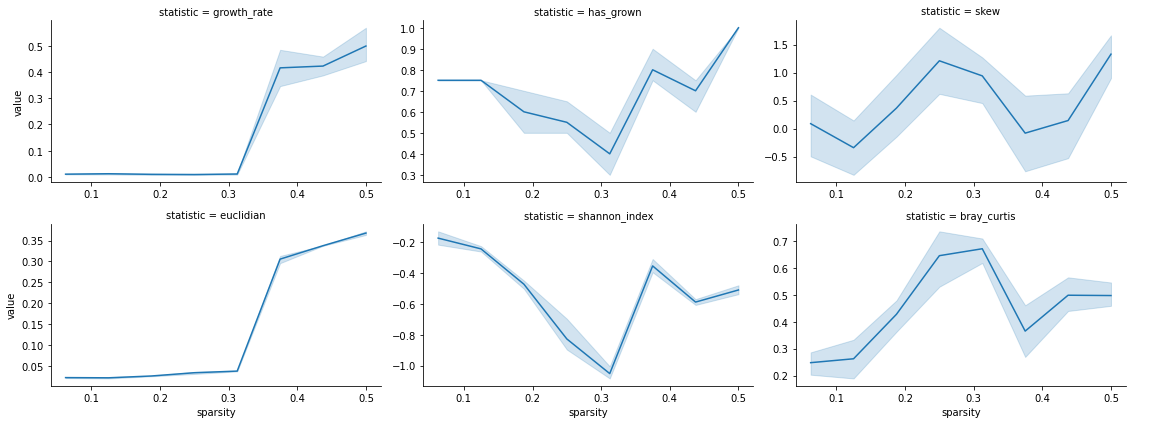

In [14]:
import seaborn as sns
#df = df[df['Size'] == 4]
plot = sns.FacetGrid(df, col='statistic',
                     sharex=False, sharey=False,
                     col_wrap=3, aspect=16/9)
plot.map_dataframe(sns.lineplot, x='sparsity', y='value')
plot.add_legend()
plot.tight_layout()
plot.fig.savefig('../Documents/figures/sparsity_analysis.png')